#**Numerical Study of 2D Inviscid Burgers Equation with Lax Method**

This notebook is created to fulfill CFD Courses, Aerospace Engineering, ITB. We want to solve the 2D Inviscid Burgers equation numerically and compare the results with the analytic solution.

We create the 2D grid using **transfinite interpolation** and discretize the Burgers equation using **Lax method** (finite difference - forward time central space (FTCS) based).

Authors:
- [Cahya Amalinadhi Putra](https://www.linkedin.com/in/cahya-amalinadhi/)
- [Muhammad Faiz Izzaturrahman](https://www.linkedin.com/in/mfaizizt)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
##**Transfinite Interpolation (TFI)**

Using Transfinite Interpolation (TFI) technique, create a program for generating uniform grids on the domain with grid size (i) N= 21 and (ii) 41

---
### **Theories**

Starts with

$R(\xi, \eta) = (X(\xi, \eta), Y(\xi, \eta))$

The **TFI** would be

$R(\xi, \eta) = U(\xi, \eta) + V(\xi, \eta) - UV(\xi, \eta)$

with 

$U(\xi, \eta) = (1-\xi)R(0,\eta) + \xi R(1,\eta)$

$V(\xi, \eta) = (1-\eta)R(\xi, 0) + \eta R(\xi, 1)$

$UV(\xi, \eta) = (1-\xi)(1-\eta)R(0, 0) + \xi (1-\eta)R(1,0) + \eta (1-\xi)R(0,1) + \xi \eta R(1,1)$

To generate the **TFI**, 
1. Define the boundary coordinates of $X$ and $Y$, let the others be $0$
2. Define $\xi$ (xi) and $\eta$ (eta) as a linear spacing from $0$ to $1$
2. Update the coordinates using **TFI**.

In [2]:
# TFI function
def TFI(N):
    """
    This function generate grid (x, y) from a defined grid size.
    The nodes are distributed uniformly

    input:
        - N (int)         : grid size.

    output:
        - X (list, float)     : nodes coordinates along X axis. Size N x N
        - Y (list, float)     : nodes coordinates along Y axis. Size N x X
        - Grid visualization
    """
    # Define xi and eta
    xi = np.linspace(0, 1, N)
    eta = np.linspace(0, 1, N)


    # Define X and Y
    X = np.zeros((N, N))
    Y = np.zeros((N, N))

    # Initialize x boundary
    X[0, :] = xi        # upper
    X[N-1, :] = xi      # lower
    X[1:-1, -1] = 1     # left
    X[1:-1, 0] = 0      # right

    # Initialize Y boundary
    Y[0, :] = 1             # upper
    Y[-1, :] = 0            # lower
    Y[:, 0] = eta[::-1]     # left
    Y[:, -1] = eta[::-1]    # right


    # Transfinite Interpolation
    for j in range(N):
        for i in range(N):
            # For X coordinates
            U = (1-xi[i])*X[j,0] + xi[i]*X[j,-1]
            V = (1-eta[j])*X[0,i] + eta[j]*X[-1,i]
            UV = (1-xi[i])*(1-eta[j])*X[0,0] + xi[i]*(1-eta[j])*X[0,-1] +\
                (1-xi[i])*eta[j]*X[-1,0] + xi[i]*eta[j]*X[-1,-1]
            X[j,i] = U + V - UV

            # For Y coordinates
            U = (1-xi[i])*Y[j,0] + xi[i]*Y[j,-1]
            V = (1-eta[j])*Y[0,i] + eta[j]*Y[-1,i]
            UV = (1-xi[i])*(1-eta[j])*Y[0,0] + xi[i]*(1-eta[j])*Y[0,-1] +\
                (1-xi[i])*eta[j]*Y[-1,0] + xi[i]*eta[j]*Y[-1,-1]
            Y[j,i] = U + V - UV


    # Plot the Grid
    fig = plt.figure(figsize=(9, 9))
    plt.scatter(X, Y, c='r', s=10)
    for i in range(N):
        plt.plot(X[:,i], Y[:,i], c='b')
    for j in range(N):
        plt.plot(X[j,:], Y[j,:], c='b')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'The Grid of {N} x {N}')
    plt.show()

    return (X, Y)

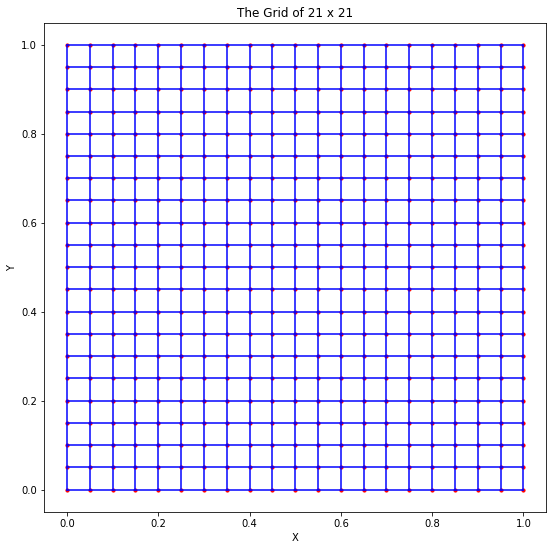

In [3]:
# Input
N = 21

# Call the TFI Function
X, Y = TFI(N)

---
## **Burgers Equation**

Deriving the Finite difference discrete equation of the Burgers equation

###**Analytic Solutions**

The Inviscid 2-D Burgers Eq:

$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + \frac{\partial u}{\partial y} = 0$

for $y \leq 0.5$

$u(x,y) = \begin{cases} 1.5, & \mbox{if   } x \leq 1.5y \\ \frac{1.5-2x}{1-2y}, & \mbox{if   } 1.5y \leq x \leq (1-0.5y) \\ -0.5 & \mbox{if   } x \geq (1-0.5y) \end{cases}$

for $y \geq 0.5$

$u(x,y) = \begin{cases} 1.5, & \mbox{if   } x \leq (0.5 + 0.5y) \\ -0.5, & \mbox{if   } x > (0.5 + 0.5y) \end{cases}$

In [4]:
def Burgers_Analytic(X, Y):
    """
    This function calculate and display the analytical solution of
    the 2D Inviscid Burgers Equation.

    input:
        - X (list, float)           : nodes coordinates along X axis. Size N x N
        - Y (list, float)           : nodes coordinates along X axis. Size N x N

    output:
        - U (list, float)           : Analytic solution
        - Solution visualization
    """

    # Size of grid
    N = len(X)

    # Initialize UAnalytic
    U = np.zeros((N, N))

    # Analytical Solution
    for j in range(N):
        for i in range(N):
            if Y[j,i]<=0.5:
                if (X[j,i]<=1.5*Y[j,i]):
                    U[j,i] = 1.5
                elif (X[j,i]<=(1-0.5*Y[j,i])):
                    U[j,i] = (1.5-2*X[j,i])/(1-2*Y[j,i])
                else:
                    U[j,i] = -0.5
            else:
                if (X[j,i]<=(0.5+0.5*Y[j,i])):
                    U[j,i] = 1.5
                else:
                    U[j,i] = -0.5


    # Plot the Burgers Equation
    plt.figure(figsize=(8, 6))
    lev = [-0.55+0.1*i for i in range(22)]
    cp = plt.contourf(X, Y, U, levels=lev)
    plt.colorbar(cp)
    plt.title(f'Analytic Solution - Grid Size: {N} x {N}')
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    plt.show()

    # 3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.view_init(65, 315)
    ax.plot_surface(X, Y, U, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(f'Analytic Solution - Grid Size: {N} x {N}')
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$U_{analytic}(X,Y)$')
    plt.show()

    return (U)

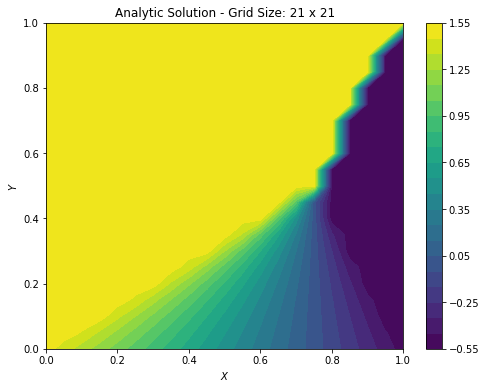

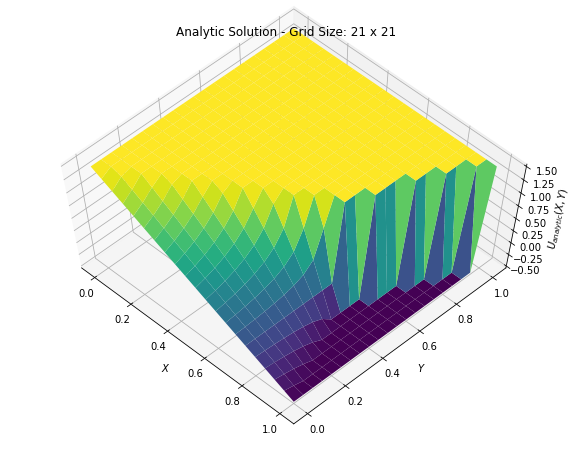

In [5]:
UAnalytic = Burgers_Analytic(X, Y)

---
### **Numerical Solutions**

Fully 2D Burgers Equation

$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \frac{1}{R} (\frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}})$

$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \frac{1}{R} (\frac{\partial^{2} v}{\partial x^{2}} + \frac{\partial^{2} v}{\partial y^{2}})$

Assuming inviscid, irrotational and $v = 1$, then

$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + \frac{\partial u}{\partial y} = 0$

$\frac{\partial u}{\partial t} + \frac{\partial E}{\partial x} + \frac{\partial u}{\partial y} = 0$

with 

$E = \frac{u^{2}}{2}$

Using **Lax Method**

$\frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} + \frac{E_{i+1,j}^{n} - E_{i-1,j}^{n}}{2 \Delta x} + \frac{u_{i,j+1}^{n} - u_{i,j-1}^{n}}{2 \Delta y} = 0$

$\frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} = - \frac{E_{i+1,j}^{n} - E_{i-1,j}^{n}}{2 \Delta x} - \frac{u_{i,j+1}^{n} - u_{i,j-1}^{n}}{2 \Delta y}$

$u_{i,j}^{n+1} = u_{i,j}^{n} - \frac{\Delta t}{2 \Delta x} (E_{i+1,j}^{n} - E_{i-1,j}^{n}) - \frac{\Delta t}{2 \Delta y} (u_{i,j+1}^{n} - u_{i,j-1}^{n})$

For stability consideration, we change $u_{i,j}^{n}$

$u_{i,j}^{n+1} = \frac{(u_{i+1,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n})}{4} - \frac{\Delta t}{2 \Delta x} (E_{i+1,j}^{n} - E_{i-1,j}^{n}) - \frac{\Delta t}{2 \Delta y} (u_{i,j+1}^{n} - u_{i,j-1}^{n})$

And we calculate the stability based on CFL

$\text{CFL} = |u \frac{\delta t}{\delta x}| < 1$

In [6]:
# the numerical solution of Burgers Equation
def Burgers_Numeric(X, Y, timestep, eps=1e-6):
    """
    This function calculate and display the numerical solution of
    the 2D Inviscid Burgers Equation.

    input:
        - X (list, float)           : nodes coordinates along X axis. Size N x N
        - Y (list, float)           : nodes coordinates along X axis. Size N x N
        - timestep (float)          : the discretization timestep
        - eps (float)               : iteration error threshold. Default: 1e-6 

    output:
        - U (list, float)           : Numeric solution
        - Visualization:
            - CFL history
            - Iteration error history
            - Initial condition
            - Solution
    """
    # INITIALIZATION
    # Define the grid size
    N = len(X)

    # Initialize U and E
    U = np.zeros((N, N))
    E = np.zeros((N, N))

    # Initialize Boundary Condition
    U[:, 0] = 1.5
    U[:, -1] = -0.5
    U[0, :] = 1.5 - 2*X[0]


    # INITIAL CONDITION VISUALIZATION
    plot_results(X, Y, U, "Initial Condition")

    # CALCULATION NUMERICAL SOLUTION
    # Start iteration
    current_error = 1
    error_history = []
    max_CFL_history = []
    
    while (current_error > eps):
        # Initialize variables in each iteration
        CFL_grid = []               # list of CFL throughout grid
        U_current = U.copy()        # Save current results    

        # Calculate E
        for j in range(N):
            for i in range(N):
                E[j,i] = (U[j,i]**2)/2

        # Calculate updated results
        for j in range(1, N-1):
            for i in range(1, N-1):
                param_x = timestep/(2*(1/(N-1)))
                param_y = timestep/(2*(1/(N-1)))
                U[j,i] = (U[j,i+1] + U[j,i-1] + U[j+1,i] + U[j-1,i])/4 \
                            - param_x*(E[j,i+1] - E[j,i-1]) \
                            - param_y*(U[j+1,i] - U[j-1,i])

                # Save the CFL
                CFL = U[j,i]*timestep/(1/(N-1))
                CFL_grid.append(CFL)

        # Calculate Error
        points_error = np.abs(U_current - U)
        current_error = np.sum(points_error)/(N**2)

        # Add value to the list
        error_history.append(current_error)
        max_CFL_history.append(max(CFL_grid))
    

    # STEADY CONDITION VISUALIZATION
    plot_results(X, Y, U, "Steady Condition")

    # HISTORY VISUALIZATION
    iter = [i+1 for i in range(len(error_history))]

    # Error plot
    plt.figure(figsize=(8, 6))
    plt.plot(iter, error_history)
    plt.title('Error history')
    plt.xlabel('iteration - ')
    plt.ylabel('Mean Absolute Error')
    plt.xlim([1, max(iter)])
    plt.grid(which='both', axis='both')
    plt.show()

    # Maximum CFL plot
    plt.figure(figsize=(8, 6))
    plt.plot(iter, max_CFL_history)
    plt.title('Maximum CFL history')
    plt.xlabel('iteration - ')
    plt.ylabel('CFL')
    plt.xlim([1, max(iter)])
    plt.grid(which='both', axis='both')
    plt.show()

    # Return
    print(f"Total iteration         : {len(error_history)}")
    print(f"Final iteration error   : {error_history[-1]:.3e}")
    print(f"Final maximum CFL       : {max_CFL_history[-1]:.4f}")

    return (U)


# plot results
def plot_results(X, Y, U, title):
    """
    This function visualize the Burgers Equation Solution.

    Input:
        - X (list, float)           : nodes coordinates along X axis. Size N x N
        - Y (list, float)           : nodes coordinates along X axis. Size N x N
        - U (list, float)           : solution. Size N x N
        - title (str)               : plot title

    Output:
        - contour plot
        - 3D plot 
    """
    # Contour Plot
    plt.figure(figsize=(8, 6))
    lev = [-0.55+0.1*i for i in range(22)]
    cp = plt.contourf(X, Y[::-1], U, levels=lev)
    plt.colorbar(cp)
    plt.title(title)
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    plt.show()

    # 3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.view_init(65, 315)
    ax.plot_surface(X, Y[::-1], U, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$U(X,Y)$')
    plt.show()


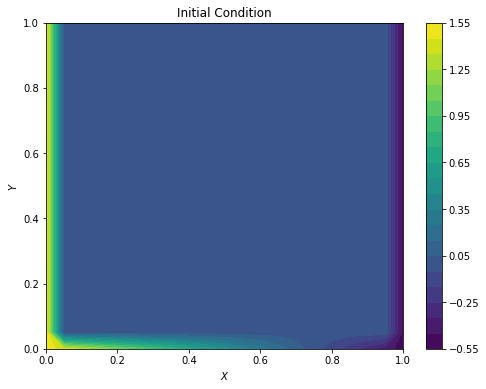

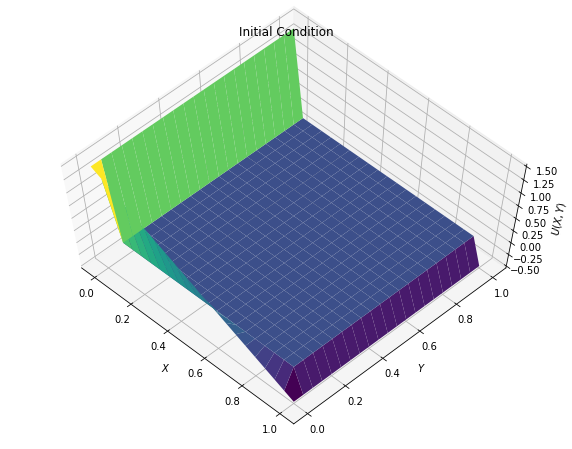

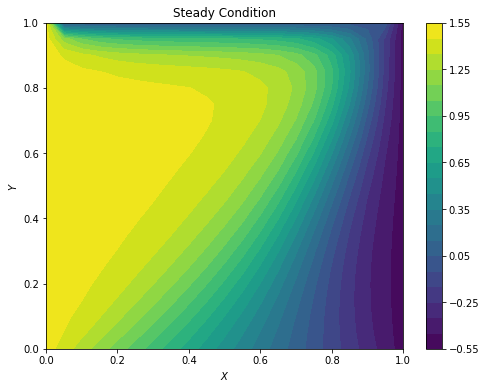

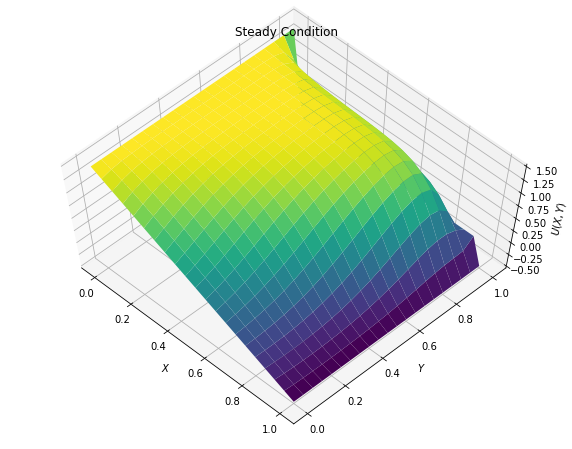

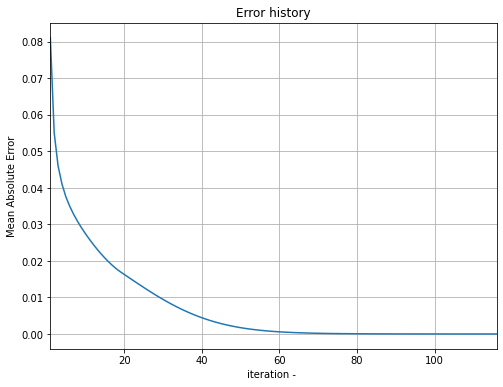

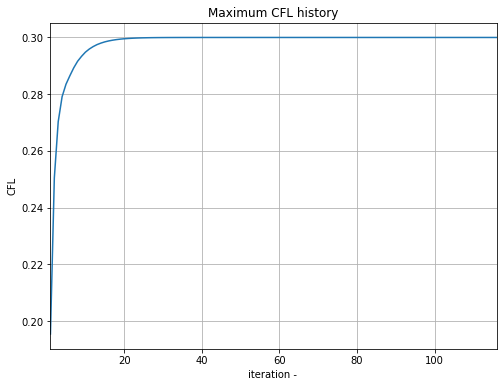

Total iteration         : 116
Final iteration error   : 9.385e-07
Final maximum CFL       : 0.3000
MSE with analytical     : 0.451


In [7]:
U = Burgers_Numeric(X, Y, timestep=0.01, eps=1e-6)
print(f"MSE with analytical     : {np.sum(np.abs(U-UAnalytic))/(N**2):.3f}")